<h1> Lecture 8 : Toy Experiments and Integration using Pseudorandom Numbers </h1>

In [1]:
import random
import numpy as np
from math import ceil

#--------------------------------------------------------------------------------------------------------------
# This method generate pseudo-random numbeers between 0 and 1 with uniform distribution initialized by a seed 
#--------------------------------------------------------------------------------------------------------------


def generate_uniform(N, seed = 0.):

    if seed != 0. : random.seed(float(seed))
    randlist = []
    for i in range (0,N):
        
        randlist.append(random.random())
    return randlist

#----------------------------------------------------------------------------------------------------------------        
# this method calculate the airthmetic mean of a sample
#---------------------------------------------------------------------------------------------------------------

def mu(sample):
    
    s = np.sum(sample)
    mu = s/len(sample)
    return mu

#----------------------------------------------------------------------------------------------------------------
#This function calculate the optimal numbers of bins for making an in Histogram un function of the number of 
#events
#---------------------------------------------------------------------------------------------------------------

def sturges(N_events):
    
    if len(N_events) != 1 :
        return ceil(1+3.322 * np.log(len(N_events)))
    else:
        return ceil(1+3.322 * np.log(N_events))

# ---------------------------------------------------------------------------------------------------------------
#this metheod calculate the variance of a sample
#---------------------------------------------------------------------------------------------------------------

def quadratic_sigma(sample):
   
    var = np.sum((sample-mu(sample))**2)/(len(sample))
    return var

#----------------------------------------------------------------------------------------------------------------
#this method calculate the standard deviation of a sample
#---------------------------------------------------------------------------------------------------------------

def sigma(sample):
    
    dev  = np.sqrt(quadratic_sigma(sample))
    return dev

#---------------------------------------------------------------------------------------------------------------

def rand_range (xMin,xMax):
    return xMin + random.random() * (xMax-xMin)

#---------------------------------------------------------------------------------------------------------------

def generate_range(N,xMin,xMax):
    randlist = []
    for i in range(N):
        randlist.append(rand_range(xMin,xMax))
    return randlist





In [2]:
from math import sqrt

class stats:
    
    summ = 0
    N = 0
    sample = []

    def __sub__ (self,other):
        return self.sample - self.other

    def __init__(self,sample):
        
        self.sample = sample
        self.summ = sum(self.sample)
        self.N = len(self.sample)

    def mean(self):
        return self.summ / self.N
    
    def variance(self, bessel = False ):
        var = sum([(x - self.mean())**2 for x in self.sample ])/self.N
        if bessel : var = sum([(x - self.mean())**2 for x in self.sample])/(self.N-1)
        return var
    
    def sigma(self,bessel = False):
        return sqrt(self.variance(bessel))
    
    def sigma_mean(self, bessel = False):
         return self.sigma(bessel)/sqrt(self.N)
    
    def skew(self,bessel = False):
        ske = sum(self.sample - self.mean())**3/(self.sigma()**3*self.N)
        if bessel: ske = sum(self.sample - self.mean())**3/(self.sigma(bessel)**3*(self.N-1))
        return ske
    
    def kurt(self, bessel = False):
        kur = sum(self.sample - self.mean())**4/(self.sigma(bessel)**4*self.N)-3
        if bessel : sum(self.sample - self.mean())**4/(self.sigma(bessel)**4*(self.N-1))-3
        return kur 
    
    def insert(self,x):
        self.sample.append(x)
        self.summ = self.summ + x
        self.N = self.N + 1

        

<h3> Exercise 8.1 </h3>
<p> Write a program that, given a number N_max, generates N_toys toy experiments, each containing a sample of N_max events following a chosen distribution, and calculates their mean. </p>

<h3> Exercise 8.2 </h3>
<p> Add to the previous program a histogram that visualizes the distribution of means across the toy experiments. </p>

Matplotlib is building the font cache; this may take a moment.


(array([  0.,   0.,   0.,   0.,   0.,   4.,  24.,  35.,  56.,  76., 104.,
         79.,  59.,  43.,  12.,   6.,   2.,   0.,   0.,   0.,   0.]),
 array([0.30116729, 0.32011632, 0.33906536, 0.3580144 , 0.37696343,
        0.39591247, 0.41486151, 0.43381054, 0.45275958, 0.47170862,
        0.49065766, 0.50960669, 0.52855573, 0.54750477, 0.5664538 ,
        0.58540284, 0.60435188, 0.62330091, 0.64224995, 0.66119899,
        0.68014803, 0.69909706]),
 <BarContainer object of 21 artists>)

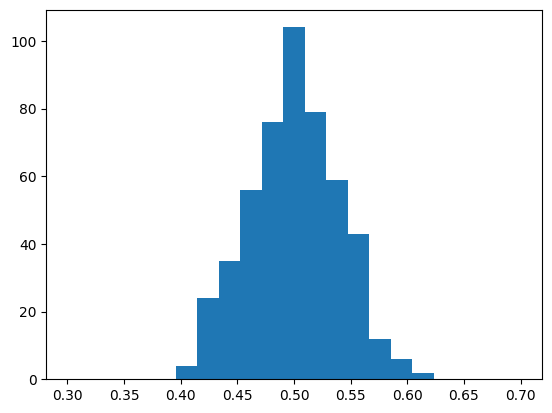

In [3]:
import matplotlib.pyplot as plt
from math import floor

N_toys = 500
N_max = 50
meantoys = []

for i in range(N_toys):
    meantoys.append(mu(generate_uniform(N_max)))



Nbins = sturges(meantoys)

xmin = mu(meantoys) - 5 * sigma(meantoys)
xmax = mu(meantoys) + 5 *sigma(meantoys)

bin_edges = np.linspace(xmin,xmax,Nbins )

plt.hist(meantoys, bins = bin_edges)



<h3> Exercise 8.3 </h3>
<p> Use the stats class developed during the previous Lectures to compare the standard deviation of the mean calculated for each individual toy with the standard deviation of the sample of means. </p>

[0.09362315982993476, 0.08049331390290518, 0.07457933708279321, 0.0973712321876717, 0.05783104863069721, 0.08214130732518762, 0.0975944277080511, 0.08847465197929372, 0.07164778865965876, 0.10344480089644682, 0.09165078862689152, 0.09256258928980765, 0.09807672543908086, 0.09443160400359878, 0.10593973820297105, 0.07509198946527725, 0.1036939775696912, 0.07720448364521323, 0.08305953822225984, 0.09961986888093775, 0.08334656548009454, 0.08814534129256535, 0.09320344226103738, 0.07813507097319661, 0.08012100042810877, 0.11505492619710192, 0.10399410157137981, 0.10642786597898289, 0.1037466473362761, 0.07136764533453221, 0.09045202135572519, 0.08686567764405138, 0.07592388274165245, 0.07588618676601781, 0.10435658973089405, 0.11857130265845531, 0.06969551427615475, 0.07574672253605617, 0.09631043326620307, 0.10784735156740327, 0.07012378718699726, 0.12072218437424068, 0.11008796503019985, 0.1067347668448478, 0.08749376698025649, 0.09331760517629961, 0.07976197807070977, 0.093898233735537

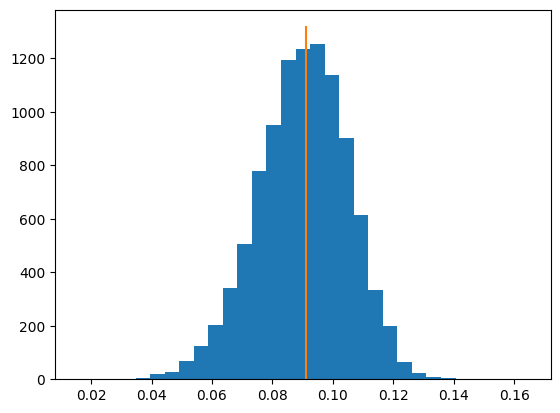

In [4]:
N_toys = 10000
N_max = 10
means = []
stdMean = []

for i in range(N_toys):

    sample = stats(generate_uniform(N_max))
    means.append(sample.mean())
    stdMean.append(sample.sigma_mean(True)) # is it beetter to use Bessel Correction because the sample N_max il small

samp = stats(means)
samp_sigmamean = samp.sigma()

print(stdMean)
print(samp_sigmamean)

Nbins = sturges(stdMean)
sigma_mean_stats = stats(stdMean)

xmin =  sigma_mean_stats.mean() - 5.* sigma_mean_stats.sigma()
xmax = sigma_mean_stats.mean() + 5. * sigma_mean_stats.sigma()

bins_edges = np.linspace(xmin,xmax,Nbins)

plt.hist(stdMean, bins = bins_edges)
plt.plot([samp.sigma(),samp.sigma()],plt.ylim())

<h4> Exercise 8.4 </h4>
<p>Use two scatter plots to compare the evolution of the standard deviation of the mean calculated for each individual toy with the standard deviation of the sample of means as the number of events generated in a single toy experiment varies. </p>

[5, 10, 20, 40, 80]
[0.128973354892882, 0.09133329286633693, 0.06399103525187735, 0.046000175766550105, 0.032220713017758106]
50000
50000


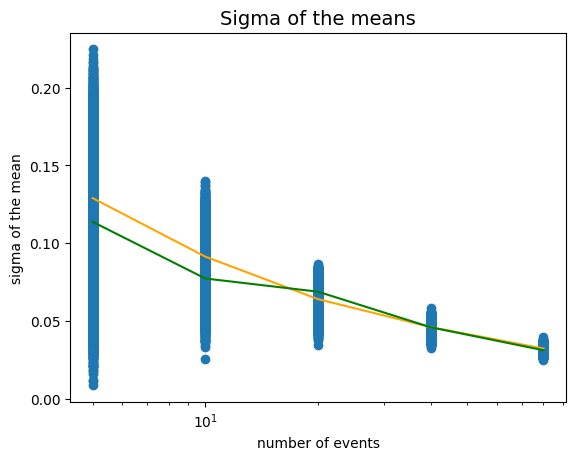

In [5]:
N_Toys = 1000

N_event_min = 5
N_event_max = 100

std_mean = [] # standard deviation of the mean of a single toy experiments 
sigma_mean = [] # standard deviation of the sample of mean
sigmas_mean = [] # standard deviation of the mean of the first set of random number generated for a variable numbers of event 

N_events = []
X = []

while(N_event_min < N_event_max):

    means = []

    for i in range(N_toys):
        randlist = generate_uniform(N_event_min)
        toy_stats = stats(randlist)
        means.append(toy_stats.mean())
        if i == 0 : sigmas_mean.append(toy_stats.sigma_mean(True))
        std_mean.append(toy_stats.sigma_mean(True))
        X += [N_event_min]
    
    N_events.append(N_event_min)

    toy_stats = stats(means)
    sigma_mean.append(toy_stats.sigma(True))
    N_event_min = N_event_min *2

print(N_events)
print(sigma_mean)
print(len(std_mean))
print(len(X))

fig, ax = plt.subplots()

ax.set_title('Sigma of the means', size = 14)
ax.set_xlabel('number of events')
ax.set_ylabel('sigma of the mean')
ax.scatter(X,std_mean)
ax.plot(N_events,sigma_mean, color = 'orange')
ax.plot(N_events,sigmas_mean, color = 'green')
ax.set_xscale('log')



<h3> Exercise 8.5 </h3>
<p> Implement the hit-or-miss integration method with the example function f(x) = sin(x).
<ul>
<li> Write the algorithm that calculates the integral as function external to the main program, ensuring it takes as input parameters the limits along the x and y axis, as well as the number of pseudo-random points to generate.
</li>
<li>Make sure the algorithm returns a container with two elements: the first element is the value of the integral, the second is its uncertainty.   </li>
</ul>
</p>

In [6]:
from math import sin, pi

#--------------------------------------------------------------------------------------------------------
#This method calculate the integral of a function using the algorithm hit or miss and the error
#of the estimate value.
#--------------------------------------------------------------------------------------------------------

def integral_HOM (func, xMin, xMax, yMax, N_evt) :

    x_coord = generate_range (N_evt,xMin, xMax)
    y_coord = generate_range (N_evt,0., yMax)

    points_under = 0
    for x, y in zip (x_coord, y_coord): #zip () generate a list of couple 
        if (func (x) > y) : points_under = points_under + 1 

    A_rett = (xMax - xMin) * yMax
    frac = float (points_under) / float (N_evt)
    integral = A_rett * frac
    integral_unc = A_rett**2 * frac * (1 - frac) / N_evt
    return integral, integral_unc

#----------------------------------------------------------------------------------------------------------

F = lambda x  : sin(x)

F_integral= integral_HOM(F,0,pi,1,10000)

print('The value of the integral is ' + str(F_integral[0]) + ' and his error is ' + str(F_integral[1]) )

The value of the integral is 2.0476900916098275 and his error is 0.0002239973437352981


<h3> Exercise 8.6 </h3>
<p>Insert the calculation of the integral from the previous exercise into a loop that, as the number N of generated points varies, displays the value of the integral and its uncertainty.
<ul>
<li> Use a scatter plot to visualize the trends of the integral value and its uncertainty as N varies on a logarithmic scale.</li>
 </ul> </p>

Text(0, 0.5, 'integral value error')

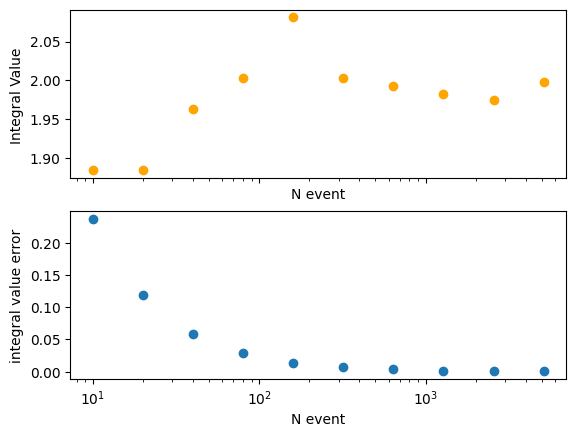

In [7]:
N_max = 10000
N_min = 10
N_event = []
integral_value = []
integral_error = []

while N_min < N_max :
    
    F_integral  = integral_HOM(F,0,pi,1,N_min)
    N_event.append(N_min)
    integral_value.append(F_integral[0])
    integral_error.append(F_integral[1])
    N_min*=2

fig, (ax1,ax2) = plt.subplots(2,1, sharex = True)
ax1.set_xscale('log')
ax2.set_xscale('log')

ax1.scatter(N_event,integral_value, color = 'orange')
ax1.set_xlabel('N event')
ax1.set_ylabel('Integral Value ')

ax2.scatter(N_event,integral_error)
ax2.set_xlabel('N event')
ax2.set_ylabel('integral value error')

<h3> Exercise 8.7 </h3>
<p>Implement the crude-MC integration method with the example function f(x) = sin(x).
<ul>
<li> Write the algorithm that calculates the integral as a function external to the main program, ensuring it takes as input parameters the limits along the x axis and the number of pseudo-random points to generate.  </li>
<li> Make sure the algorithm returns a container with two elements: the first element is the value of the integral, the second is its uncertainty. </li>
</ul>
 </p>

In [8]:
#------------------------------------------------------------------------------------------------------------------------------------------
# This method implement a simple Monte Carlo algorithm for the evalutation of a one variable integral
#------------------------------------------------------------------------------------------------------------------------------------------

def simple_MonteCarlo(f, xMin,xMax, N_event):
    
    x_coord = generate_range(N_event,xMin,xMax)

    range = (xMax - xMin)
    f_list = [f(x) for x in x_coord]
    f_mean = stats(f_list).mean()
    integralValue = f_mean*range
    f_square = [f(x)*f(x) for x in x_coord]
    integralError = range*sqrt((stats(f_square).mean() - f_mean*f_mean)/len(f_list))
    
    return [integralValue,integralError]



F = lambda x : sin(x)

xmin = 0
xmax = pi
N_event = 1000
integral = simple_MonteCarlo(F,xmin,xmax,N_event)

print(integral)




[1.9850480718198598, 0.030503155220364127]


<h3> Exercise 8.8 </h3>
<p> Insert the calculation of the integral from the previous exercise into a loop that, as the number N of generated points varies, displays the value of the integral and its uncertainty.
<ul>
<li>Plot the trends of the integral value and its uncertainty as N varies on a logarithmic scale. </li>
<li>Overlay this behavior with the one obtained from completing Exercise 8.6. </li>
</p>

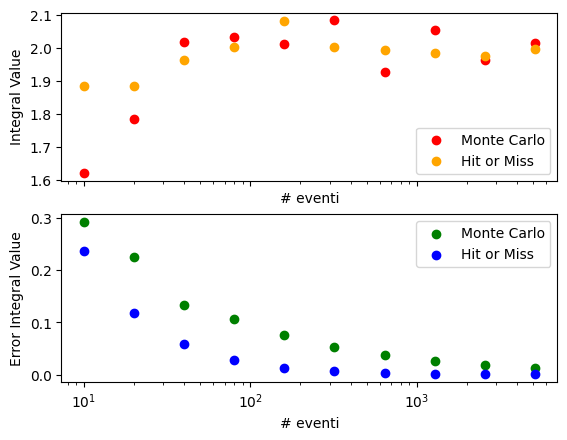

In [9]:
F = lambda x : sin(x)

xmin = 0
xmax = pi
N_min = 10
N_max = 10000

integralValue = []
integralError = []
N_event = []

while N_min < N_max:

    integral = simple_MonteCarlo(F,xmin,xmax,N_min)
    integralValue.append(integral[0])
    integralError.append(integral[1])
    N_event.append(N_min)
    N_min *= 2

fig, (ax1,ax2)  = plt.subplots(2,1, sharex = True)

ax1.set_xscale('log')
ax1.scatter(N_event,integralValue , color = 'red', label = 'Monte Carlo')
ax1.scatter(N_event,integral_value, color = 'orange', label = 'Hit or Miss')
ax1.set_xlabel('# eventi')
ax1.set_ylabel('Integral Value')

ax2.scatter(N_event,integralError, color ='green' , label = 'Monte Carlo')
ax2.scatter(N_event,integral_error, color = 'blue' , label = 'Hit or Miss')
ax2.set_xlabel('# eventi')
ax2.set_ylabel('Error Integral Value')

ax1.legend()
ax2.legend()


    

<h3> Exercise 8.9 </h3>
<p> Use the hit-or-miss method to estimate the integral underlying a Gaussian probability distribution with μ=0 and σ=1 within a generic interval [a,b].
<ul><li>Calculate the integral contained within the intervals [-kσ, kσ] as k varies from 1 to 5.</li> </ul>
</p>

In [11]:
from math import exp

G = lambda x : 1/(sqrt(2*pi)*sigma)*exp(-(x-mu)**2/2*sigma**2)

mu = 0 
sigma = 1
N_event = 1000

for k in range(1,5):
    xmin = -k*sigma
    xmax = k*sigma
    inteValue,inteErr = integral_HOM(G,xmin,xmax,G(mu),N_event)
    print ('integral at ', k , 'sigma: ', inteValue,
               ' +- ', inteErr)





integral at  1 sigma:  0.6805955303648442  +-  7.982638987694341e-05
integral at  2 sigma:  0.9941641627603703  +-  0.0005980940902229849
integral at  3 sigma:  0.9143757066800838  +-  0.0013526158444330425
integral at  4 sigma:  1.0212922378276676  +-  0.0022164553994749713
